# Aula 04

In [1]:
# Importando base de dados completa
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

df_dados = pd.read_csv(url_dados, compression = 'zip')
df_dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [2]:
# Importa basede dados dos resultados
url_dados_resultados = 'https://github.com/mjuliacsouza/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

df_result = pd.read_csv(url_dados_resultados)
df_result.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analisando resultados

In [3]:
# Verificando o tipo de respostas dentro de cada coluna
df_result['acat_inhibitor'].unique()

array([0, 1], dtype=int64)

In [4]:
# Usando o drop para retirar a coluna de id
cont_drop = df_result.drop('id', axis=1).sum().sort_values(ascending=False)
cont_drop

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [5]:
# Contagem de moa ativos por linhas
cont_row = df_result.drop('id', axis=1).sum(axis=1)
cont_row

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [6]:
# Criando a coluna da soma por linhas
df_result['n_moa'] = cont_row
df_result['ativo_moa'] = df_result['n_moa'] != 0
df_result.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


## Fazendo merge das duas tabelas, dados e resultados

In [7]:
df_merged = pd.merge(df_dados, df_result[['id','n_moa','ativo_moa']], on='id')
df_merged

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,1,True
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1,True
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,0,False
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,1,True


In [8]:
# Seleciona as linhas de controle e verifica se houve alguma ativação
df_merged.query('tratamento == "com_controle"')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050,0,False
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820,0,False
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180,0,False
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,...,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367,0,False
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,...,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,...,-0.2065,0.8314,-0.1891,-0.0074,0.2131,-0.1419,-0.2422,0.0457,0,False
23747,id_ff469c482,com_controle,72,D1,cacb2b860,-0.6204,-1.3800,-1.1880,-0.6573,-0.8408,...,0.5468,1.1450,0.5254,0.6224,-0.9630,0.8872,-0.0742,-0.6777,0,False
23768,id_ff89331ca,com_controle,72,D2,cacb2b860,-0.1051,0.4335,0.3648,-0.0525,-0.3632,...,0.4963,0.9434,-0.4779,0.6951,0.9517,-0.8110,-0.1748,-0.3626,0,False
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082,0,False


In [9]:
# Seleciona as linhas de com droga e verifica se houve alguma ativação
df_merged.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

## Plotando gráficos

In [10]:
# Armazena os 5 primeiros compostos mais utilizados
main_comp = df_merged['droga'].value_counts().index[:5]
main_comp

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

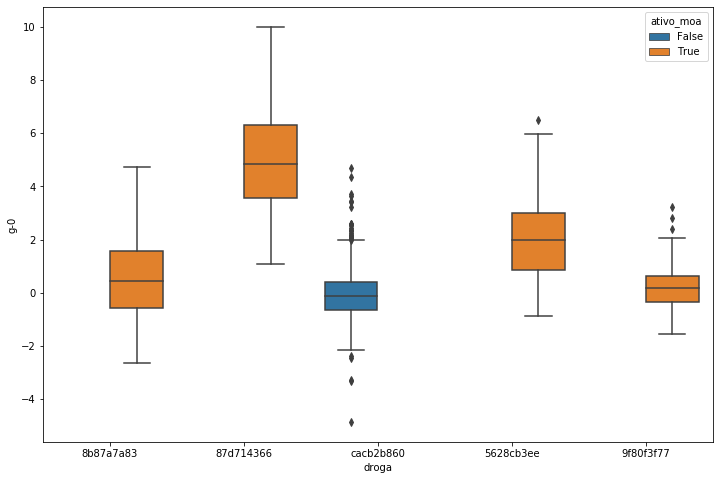

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

sns.boxplot(data = df_merged.query('droga in @main_comp'), x='droga', y='g-0',hue='ativo_moa')

## Desafios da aula:
  #### - Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)
  #### - Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle
  #### - Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72
  #### - Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
  #### - Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)
  #### - Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA
  #### - Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes
  #### - Desafio 08: Resumo do que aprendeu com os dados


### Desafio 01

In [13]:
import numpy as np

moas = np.unique([col.split('_')[-1] for col in df_result.drop('id',axis=1).columns])
frequency = df_result.drop(['id','n_moa', 'ativo_moa'], axis=1).sum()
cont = dict.fromkeys(moas, [0])

for i in frequency.index:
    cont[i.split('_')[-1]] += frequency[i]

top = pd.DataFrame.from_dict(cont).T.rename({0:"count"},axis=1).sort_values(by='count', ascending=False)
top10 = top.head(10)
top10.iloc[:,0]

inhibitor            9693
antagonist           3449
agonist              2330
blocker               323
agent                 150
activator             115
local                  80
antioxidant            73
anti-inflammatory      73
immunosuppressant      73
Name: count, dtype: int64

### Desafio 02

In [19]:
df_merged['eh_controle'] = df_merged['tratamento'].map( lambda x: 1 if x == 'com_controle' else 0)
df_merged.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0


### Desafio 03

In [14]:
# Cria uma nova coluna para cada tempo
df_result['24'] = (df_dados['tempo'] == 24)
df_result['48'] = (df_dados['tempo'] == 48)
df_result['72'] = (df_dados['tempo'] == 72)
df_result.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,24,48,72
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,True,True,False,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,True,False,True,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,True,False,False,True


In [ ]:
# Faz merge da coluna dados com os novos resultados
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa','eh_controle','24','48','72']], on='id')
dados_combinados.head()

### Desafio 05

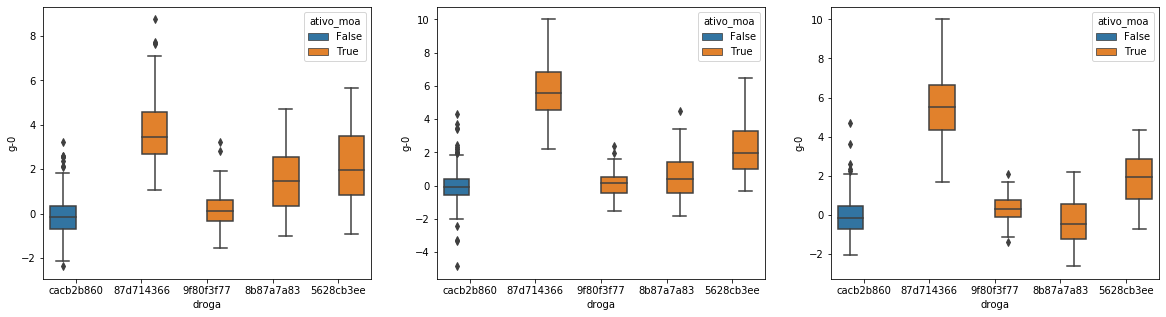

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

sns.boxplot(data = df_merged.query('droga in @main_comp & tempo == 24'), y= 'g-0', x='droga',
            hue='ativo_moa', order=main_comp, ax=ax1)
sns.boxplot(data = df_merged.query('droga in @main_comp & tempo == 48'), y='g-0', x='droga',
            hue='ativo_moa', order=main_comp, ax=ax2)
sns.boxplot(data = df_merged.query('droga in @main_comp & tempo == 72'), y='g-0', x='droga',
            hue='ativo_moa', order=main_comp, ax=ax3)
plt.show()

### Desafio 06

Na nossa tentativa parece que ou todos os compostos ativam ou nenhum ativa mesmo para números de horas e doses diferentes. Vamos utilizar o mean como uma forma de identificar se acontece alguma mudança dependendo da dose ou da hora. Caso não ocorra teremos True ou False como resultado.

In [16]:
df_merged.groupby('droga').ativo_moa.mean().value_counts()

True     2076
False    1213
Name: ativo_moa, dtype: int64

Repare que temos apenas Trues e Falses como resultados. Isso significa que quando um composto realiza a ativação essa ativação já aparece em cada uma das fases. 

### Desafio 07

### Desafio 08
- Observou-se que um determinado composto pode ativar mais de um mecanismo(moa)